In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle datasets download -d pcbreviglieri/pneumonia-xray-images

100% 1.14G/1.14G [00:24<00:00, 45.6MB/s]



In [4]:
import zipfile
zf = "/content/pneumonia-xray-images.zip"
target_dir = "/content/dataset/cnn/pneumonia_revamped"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import glob
import cv2

In [45]:
batch_size = 48

img_height = 224
img_width = 224

In [46]:
print(os.listdir('/content/dataset/cnn/pneumonia_revamped'))

['test', 'train', 'val']


In [53]:
train_images = []
train_labels = []

for directory_path in glob.glob("/content/dataset/cnn/pneumonia_revamped/train/*"):
  label = directory_path.split("/")[-1]
  print(label)

  for img_path in glob.glob(os.path.join(directory_path,"*.jpeg")):
    print(img_path)
    img = cv2.imread(img_path,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(img_height,img_width))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    train_images.append(img)
    train_labels.append(0)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

opacity
/content/dataset/cnn/pneumonia_revamped/train/opacity/person1140_virus_1885.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person1241_bacteria_3197.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person1343_bacteria_3419.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person531_bacteria_2237.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person934_virus_1595.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person1341_bacteria_3406.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person415_bacteria_1839.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person1342_bacteria_3407.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person463_virus_953.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person1158_virus_1941.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person1209_bacteria_3161.jpeg
/content/dataset/cnn/pneumonia_revamped/train/opacity/person818_bacteria_2729.jpeg
/c

In [54]:
test_images = []
test_labels = []

for directory_path in glob.glob("/content/dataset/cnn/pneumonia_revamped/test/*"):
  label_t = directory_path.split("/")[-1]
  print(label_t)

  for img_path in glob.glob(os.path.join(directory_path,"*.jpeg")):
    print(img_path)
    img = cv2.imread(img_path,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(img_height,img_width))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    test_images.append(img)
    test_labels.append(label_t)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

opacity
/content/dataset/cnn/pneumonia_revamped/test/opacity/person143_bacteria_687.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person1_virus_8.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person42_virus_89.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person1680_virus_2897.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person111_bacteria_535.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person44_virus_94.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person52_virus_106.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person3_virus_17.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person1_virus_9.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person91_bacteria_446.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person1_virus_7.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person100_bacteria_481.jpeg
/content/dataset/cnn/pneumonia_revamped/test/opacity/person1612

In [58]:
valid_images = []
valid_labels = []

for directory_path in glob.glob("/content/dataset/cnn/pneumonia_revamped/val/*"):
  label_t = directory_path.split("/")[-1]
  print(label_t)

  for img_path in glob.glob(os.path.join(directory_path,"*.jpeg")):
    print(img_path)
    img = cv2.imread(img_path,cv2.IMREAD_COLOR)
    img = cv2.resize(img,(img_height,img_width))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    valid_images.append(img)
    valid_labels.append(label_t)

valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

opacity
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1400_bacteria_3551.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1477_virus_2561.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1470_bacteria_3830.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1486_bacteria_3885.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1488_virus_2587.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1404_bacteria_3561.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1405_bacteria_3567.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1636_bacteria_4337.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1539_virus_2679.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1430_virus_2444.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1689_bacteria_4474.jpeg
/content/dataset/cnn/pneumonia_revamped/val/opacity/person1674_bacteria_4437.jpeg
/content/dataset/cnn

In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(valid_labels)
valid_labels_encoded = le.transform(valid_labels)

In [60]:
valid_labels_encoded

array([1, 1, 1, ..., 0, 0, 0])

In [56]:
test_labels_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [61]:
X_train,y_train,X_test,y_test = train_images,train_labels_encoded,valid_images,valid_labels_encoded

In [62]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [63]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [64]:
import matplotlib.pyplot as plt

from keras.models import Model,Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [65]:
VGG_model = VGG16(weights = 'imagenet', include_top = False,input_shape=(img_width,img_height,3))

for layer in VGG_model.layers:
  layer.trainable = False
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [66]:
feature_extractor = VGG_model.predict(X_train)
features = feature_extractor.reshape(feature_extractor.shape[0],-1)

In [67]:
X_for_RF = features

In [68]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=50,random_state=42)

In [69]:
RF_model.fit(X_for_RF,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [70]:
X_test_feature = VGG_model.predict(X_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0],-1)

In [71]:
prediction_RF = RF_model.predict(X_test_features)
prediction_RF = le.inverse_transform(prediction_RF)

In [82]:
prediction_RF

array(['normal', 'normal', 'normal', ..., 'normal', 'normal', 'normal'],
      dtype='<U7')

In [77]:
valid_labels

array(['opacity', 'opacity', 'opacity', ..., 'normal', 'normal', 'normal'],
      dtype='<U7')

In [76]:
from sklearn import metrics 
print("Accuracy = ",metrics.accuracy_score(valid_labels,prediction_RF))

Accuracy =  0.2567307692307692


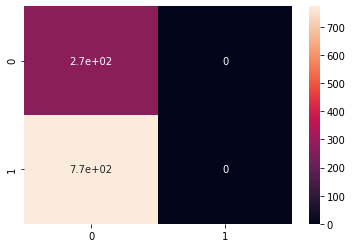

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(valid_labels,prediction_RF)
sns.heatmap(cm,annot=True)